# Janus Order
This notebook recreates a figure in Rein & Tamayo 2017. We run many simulations of the Solar System to check the convergence of Janus as a function of the timestep. 

In [6]:
import rebound
print(rebound.__build__,rebound.__githash__)
import numpy as np
import warnings
from multiprocessing import Pool
%matplotlib inline
import matplotlib.pyplot as plt

Apr 15 2017 21:13:57 c7e77b838d033099915dd47d9f2d7a6479daf788


In [7]:
def runsim(args):
    dt,order = args
    # Load the Solar System from a file. 
    # The data comes from horizons but has been cached for speed.
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sim = rebound.Simulation.from_file("ss-2016-06-18.bin")
    sim.integrator = "janus"
    sim.dt = dt
    sim.ri_janus.order= order
    sim.ri_janus.scale_pos = 1e-16
    sim.ri_janus.scale_vel = 1e-16
    sim.step()
    sim.t = 0
    e0 = sim.calculate_energy()
    sim.integrate(1000.*2.*np.pi)
    e1 = sim.calculate_energy()
    return np.abs((e0-e1)/e0)

In [ ]:
N = 500
orders = [2,4,6,8,10]
timesteps = np.logspace(-2.1,-0.2,N)
args = []
for o in range(len(orders)):
    for i in range(N):
        args.append((timesteps[i],orders[o]))
p = Pool(24)
res = p.map(runsim, args)        

In [ ]:
errors = np.array(res).reshape((len(orders),N))

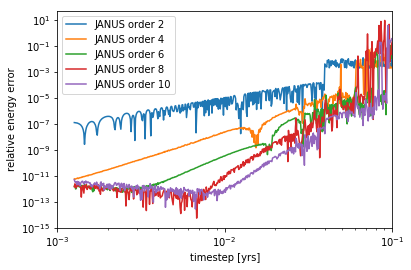

In [ ]:
f, (ax1) = plt.subplots(1,1, sharey=True,figsize=(6, 4))
ax1.set_xlim([1e-3,1.e-1])
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel("timestep [yrs]")
ax1.set_ylabel("relative energy error")
for o in range(len(orders)):
    ax1.plot(timesteps/2/np.pi,errors[o],label="JANUS order %d"%orders[o])
legend = ax1.legend(loc='upper left')   
plt.savefig("janus_order.pdf", format='pdf', bbox_inches='tight', pad_inches=0)